<a href="https://colab.research.google.com/github/aenkya/clumps/blob/main/swarm_intelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# --- Dataset ---
X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
def fitness_function(params):
    C, gamma = params
    model = SVC(C=C, gamma=gamma)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return 1 - accuracy_score(y_test, preds)  # minimize error

In [3]:

num_particles = 15
num_dimensions = 2  # C, gamma
max_iter = 20
bounds = [(0.1, 100), (0.0001, 1)]

positions = np.random.uniform([b[0] for b in bounds], [b[1] for b in bounds],
                               size=(num_particles, num_dimensions))
velocities = np.zeros((num_particles, num_dimensions))

pbest_positions = np.copy(positions)
pbest_scores = np.array([fitness_function(p) for p in positions])

gbest_index = np.argmin(pbest_scores)
gbest_position = pbest_positions[gbest_index]
gbest_score = pbest_scores[gbest_index]

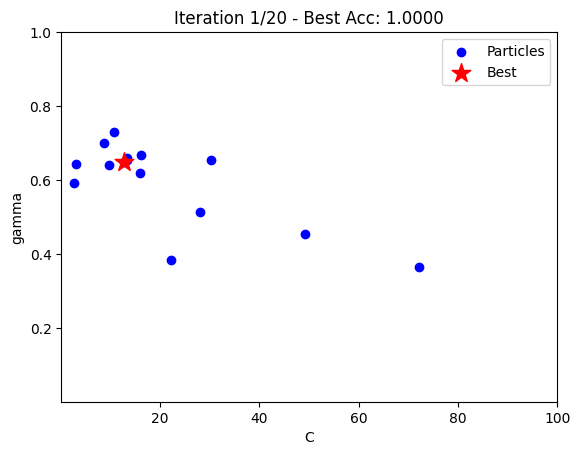


Best Hyperparameters found:
C = 12.8241, gamma = 0.6483
Test Accuracy = 1.0000


In [4]:
plt.ion()
fig, ax = plt.subplots()
ax.set_xlim(bounds[0][0], bounds[0][1])
ax.set_ylim(bounds[1][0], bounds[1][1])
ax.set_xlabel("C")
ax.set_ylabel("gamma")
ax.set_title("PSO Swarm Movement")

# --- PSO Loop ---
w, c1, c2 = 0.5, 1.5, 1.5
for iteration in range(max_iter):
    ax.clear()
    ax.set_xlim(bounds[0][0], bounds[0][1])
    ax.set_ylim(bounds[1][0], bounds[1][1])
    ax.set_xlabel("C")
    ax.set_ylabel("gamma")
    ax.set_title(f"Iteration {iteration+1}/{max_iter} - Best Acc: {1 - gbest_score:.4f}")

    for i in range(num_particles):
        r1, r2 = np.random.rand(2)
        velocities[i] = (w * velocities[i]
                         + c1 * r1 * (pbest_positions[i] - positions[i])
                         + c2 * r2 * (gbest_position - positions[i]))
        positions[i] += velocities[i]
        positions[i] = np.clip(positions[i],
                               [b[0] for b in bounds],
                               [b[1] for b in bounds])
        score = fitness_function(positions[i])

        if score < pbest_scores[i]:
            pbest_scores[i] = score
            pbest_positions[i] = positions[i]
        if score < gbest_score:
            gbest_score = score
            gbest_position = positions[i]

    # Plot particles and global best
    ax.scatter(positions[:, 0], positions[:, 1], color="blue", label="Particles")
    ax.scatter(gbest_position[0], gbest_position[1], color="red", marker="*", s=200, label="Best")
    ax.legend(loc="upper right")

    plt.pause(0.3)

plt.ioff()
plt.show()

print("\nBest Hyperparameters found:")
print(f"C = {gbest_position[0]:.4f}, gamma = {gbest_position[1]:.4f}")
print(f"Test Accuracy = {1 - gbest_score:.4f}")